In [3]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

2023-02-25 16:50:40.035296: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


### Preprocessing the training set
###### Firstly, transformations allow for increasing the diversity of the training dataset by applying different transformations to images, such as rotations, translations, resizing, contrast changes, or color normalizations. This way, the model learns to better generalize and cope with different lighting conditions, viewing angles, etc.

In [4]:

train_data_image = ImageDataGenerator(rescale=1./255,
                                     shear_range=0.2,
                                     zoom_range = 0.2,
                                     horizontal_flip = True)
training_set = train_data_image.flow_from_directory('dogs-cats/training_set',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

Found 8005 images belonging to 2 classes.


### Preprocessing the test set

In [5]:
# we have to rescale images but CANNOT use the same tranformations as in train set 
test_data_image = ImageDataGenerator(rescale = 1./255)
test_set = test_data_image.flow_from_directory('dogs-cats/test_set',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'binary')

Found 2023 images belonging to 2 classes.


### Buillding the CNN

In [6]:
cnn = tf.keras.models.Sequential() 
# convolutional layer
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[64, 64, 3]))
# pooling
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
# second convolutional layer
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
# flattening
cnn.add(tf.keras.layers.Flatten())
# full connection
cnn.add(tf.keras.layers.Dense(units=64, activation='relu'))
# output layer
cnn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

2023-02-25 16:50:52.130616: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


### Training the CNN

In [9]:
cnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
cnn.fit(x=training_set, validation_data=test_set, epochs=10)

Epoch 1/10
251/251 [==============================] - 71s 277ms/step - loss: 0.5754 - accuracy: 0.6934 - val_loss: 0.5840 - val_accuracy: 0.7034
Epoch 2/10
251/251 [==============================] - 71s 282ms/step - loss: 0.5372 - accuracy: 0.7248 - val_loss: 0.5176 - val_accuracy: 0.7548
Epoch 3/10
251/251 [==============================] - 65s 260ms/step - loss: 0.5137 - accuracy: 0.7449 - val_loss: 0.5912 - val_accuracy: 0.7113
Epoch 4/10
251/251 [==============================] - 59s 235ms/step - loss: 0.4967 - accuracy: 0.7555 - val_loss: 0.4906 - val_accuracy: 0.7692
Epoch 5/10
251/251 [==============================] - 62s 246ms/step - loss: 0.4788 - accuracy: 0.7641 - val_loss: 0.4800 - val_accuracy: 0.7845
Epoch 6/10
251/251 [==============================] - 62s 246ms/step - loss: 0.4609 - accuracy: 0.7804 - val_loss: 0.4959 - val_accuracy: 0.7612
Epoch 7/10
251/251 [==============================] - 62s 249ms/step - loss: 0.4471 - accuracy: 0.7885 - val_loss: 0.4957 - val_ac

In [34]:
import numpy as np
import keras.utils as image

def predict_dog_or_cat(file_path):
    test_image = image.load_img(file_path, target_size = (64, 64))
    test_image = image.img_to_array(test_image)
    test_image = np.expand_dims(test_image, axis = 0)
    result = cnn.predict(test_image)
    training_set.class_indices
    if result[0][0] == 1:
      prediction = 'This is a dog'
    else:
      prediction = 'This is a cat'
    return prediction

###### For test purposes I'll take photo of my dog - Figa :) 

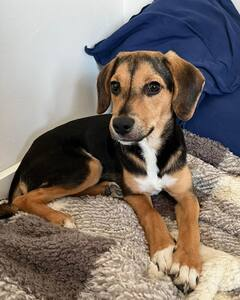

In [33]:
print(predict_dog_or_cat('dogs-cats/figa_image.jpeg'))

1/1 [==============================] - 0s 22ms/step
This is a dog
